## packages and dataset load

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = catalog.load('titanic_train_dataset')

[02/24/23 22:04:14] INFO     Loading data from 'titanic_train_dataset' (CSVDataSet)...          data_catalog.py:343

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

In [6]:
# PassengerId: Id from each passenger
# Name: Name from each passenger
# Ticket: Pass id
# Cabin: Cabine passager

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

## Survived

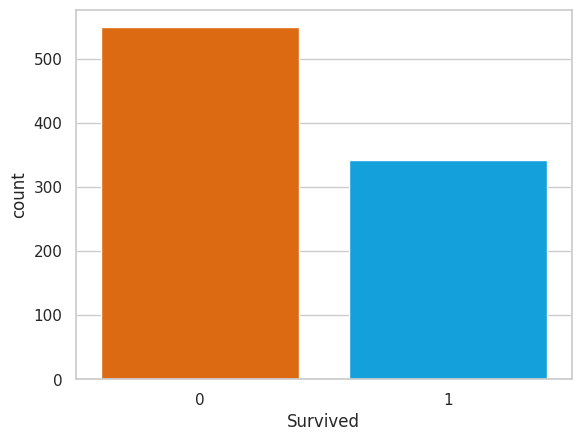

In [8]:
sns.countplot(data=df, x ="Survived", saturation=1, palette=['#DB6A13', '#13a0db'])

## Pclass

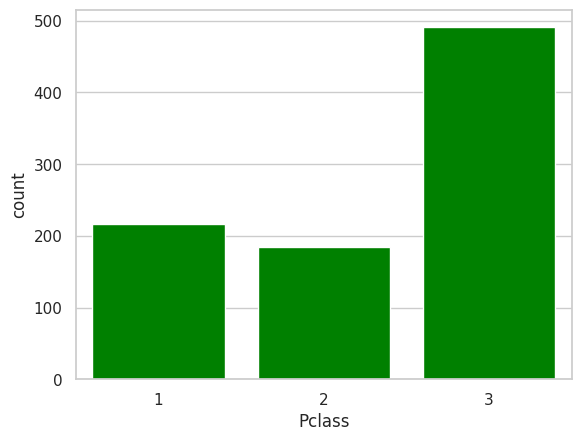

In [9]:
sns.countplot(data=df, x ="Pclass",saturation=1,color='green')

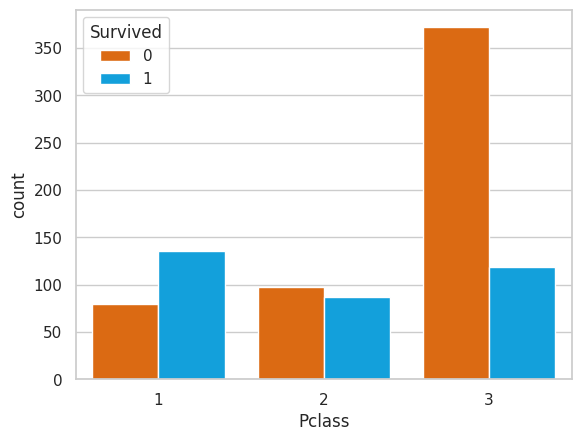

In [10]:
sns.countplot(data=df, x="Pclass", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])

## Sex

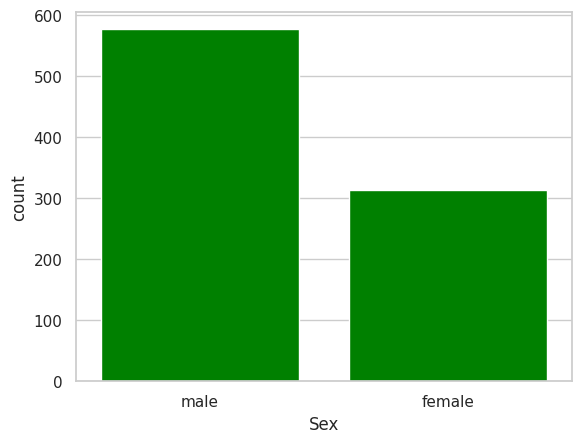

In [11]:
sns.countplot(data=df, x ="Sex", color='green', saturation=1)

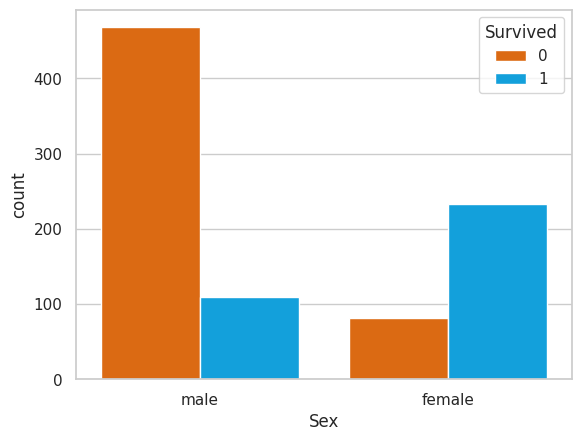

In [12]:
sns.countplot(data=df, x="Sex", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])

## Age

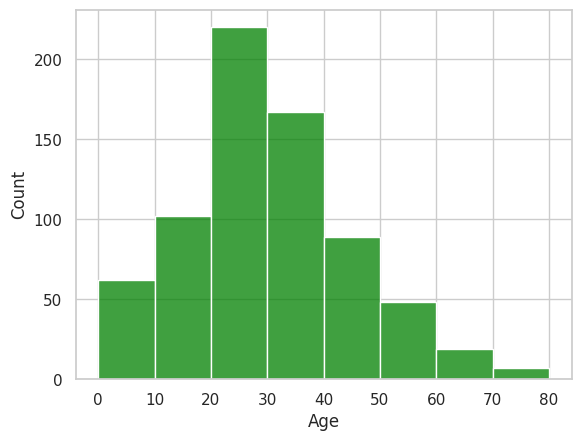

In [13]:
sns.histplot(data=df, x ="Age", color='green', bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

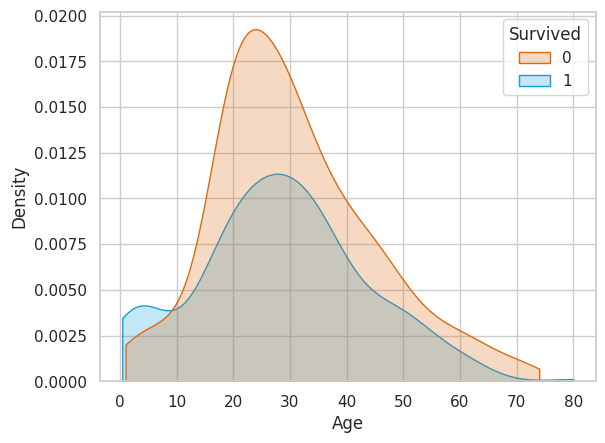

In [14]:
sns.kdeplot(data=df, x="Age", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [15]:
np.min(df['Age'])

0.42

In [16]:
np.max(df['Age'])

80.0

In [17]:
mean_age = round(df['Age'].mean())
mean_age

30

In [18]:
df.loc[(df.Age.isnull()),'Age'] = mean_age

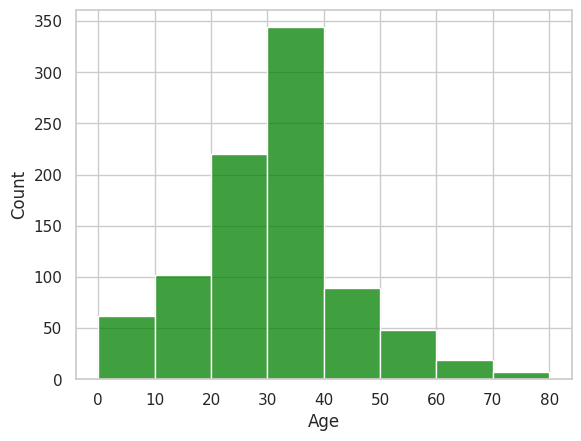

In [19]:
sns.histplot(data=df, x ="Age", color='green', bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

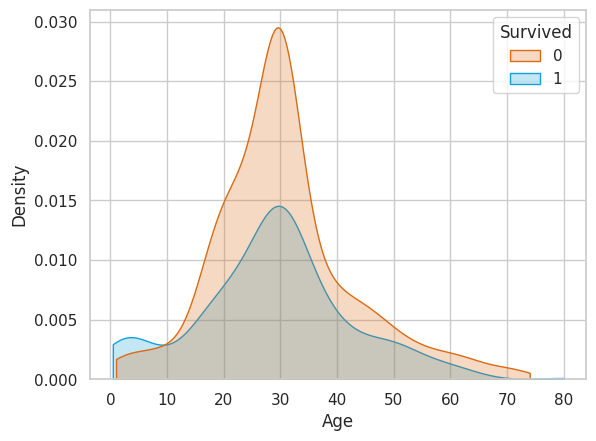

In [20]:
sns.kdeplot(data=df, x="Age", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [21]:
# The following are the American Medical Associations’ age designations:
# Neonates or newborns (birth to 1 month)
# Infants (1 month to 1 year)
# Children (1 year through 12 years)
# Adolescents (13 years through 17 years. They may also be referred to as teenagers depending on the context.)
# Adults (18 years or older)
# Older adults (65 and older)*

# My definition:
#0 (Children) Age < 12
#1 (Adolescents) 12 <= Age < 18
#2 (Adults 1) 18 <= Age < 34
#3 (Adults 2) 34 <= Age < 50
#4 (Adults 3) 50 <= Age < 65
#5 (Seniors) 65 <= Age

In [22]:
df['age_category'] = 0
df.loc[(df['Age'] < 12),'age_category'] = 0
df.loc[(df['Age'] >= 12)&(df['Age'] < 18),'age_category'] = 1
df.loc[(df['Age'] >= 18)&(df['Age'] < 34),'age_category'] = 2
df.loc[(df['Age'] >= 34)&(df['Age'] < 50),'age_category'] = 3
df.loc[(df['Age'] >= 50)&(df['Age'] < 65),'age_category'] = 4
df.loc[(df['Age'] >= 65),'age_category'] = 5

[
    Text(0, 0, '68'),
    Text(0, 0, '45'),
    Text(0, 0, '527'),
    Text(0, 0, '177'),
    Text(0, 0, '63'),
    Text(0, 0, '11')
]

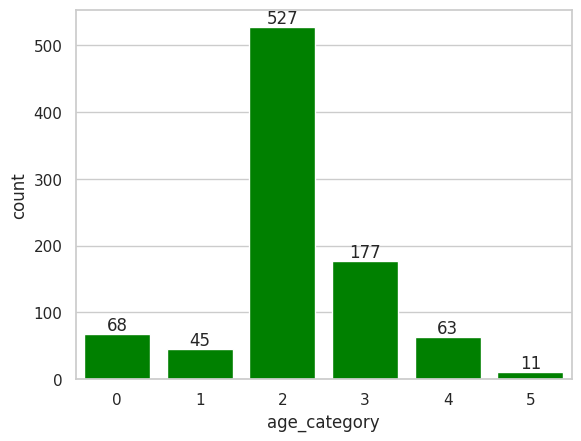

In [23]:
ax = sns.countplot(data=df, x ="age_category", color='green', saturation=1)
ax.bar_label(ax.containers[0])

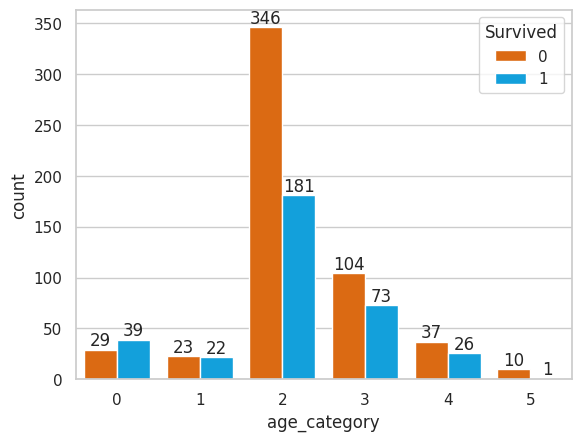

In [24]:
ax = sns.countplot(data=df, x="age_category", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])
for container in ax.containers:
    ax.bar_label(container)

## SibSp

[
    Text(0, 0, '608'),
    Text(0, 0, '209'),
    Text(0, 0, '28'),
    Text(0, 0, '16'),
    Text(0, 0, '18'),
    Text(0, 0, '5'),
    Text(0, 0, '7')
]

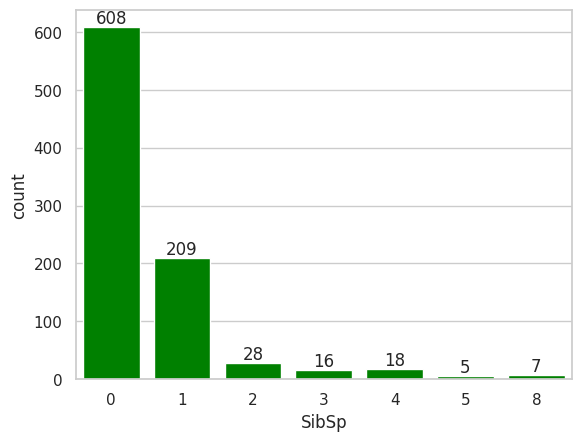

In [25]:
ax = sns.countplot(data=df, x ="SibSp",saturation=1,color='green')
ax.bar_label(ax.containers[0])

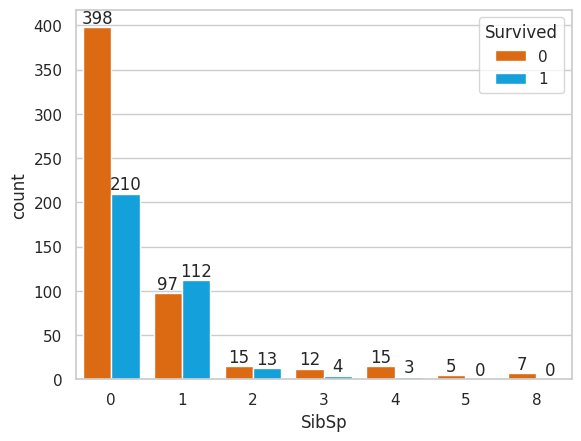

In [26]:
ax = sns.countplot(data=df, x="SibSp", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])
for container in ax.containers:
    ax.bar_label(container)

## Parch

[
    Text(0, 0, '678'),
    Text(0, 0, '118'),
    Text(0, 0, '80'),
    Text(0, 0, '5'),
    Text(0, 0, '4'),
    Text(0, 0, '5'),
    Text(0, 0, '1')
]

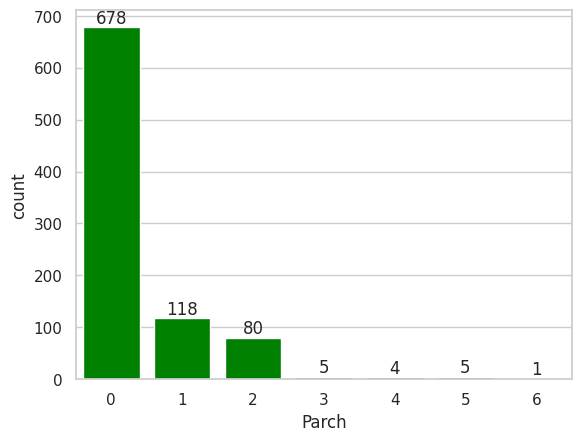

In [27]:
ax = sns.countplot(data=df, x ="Parch",saturation=1,color='green')
ax.bar_label(ax.containers[0])

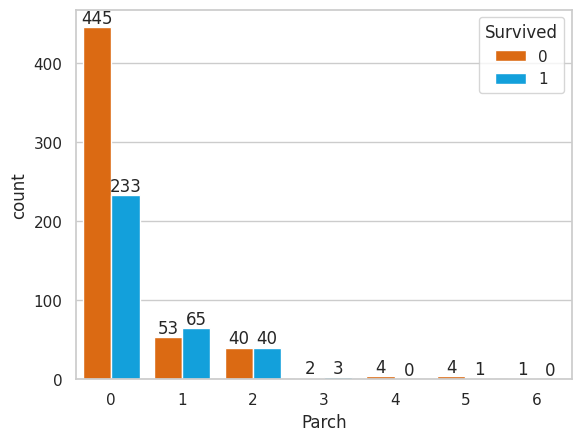

In [28]:
ax = sns.countplot(data=df, x="Parch", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])
for container in ax.containers:
    ax.bar_label(container)

## Fare

[
    Text(0, 0, '730'),
    Text(0, 0, '108'),
    Text(0, 0, '24'),
    Text(0, 0, '9'),
    Text(0, 0, '11'),
    Text(0, 0, '6'),
    Text(0, 0, '0'),
    Text(0, 0, '0'),
    Text(0, 0, '0'),
    Text(0, 0, '0'),
    Text(0, 0, '3'),
    Text(0, 0, '0')
]

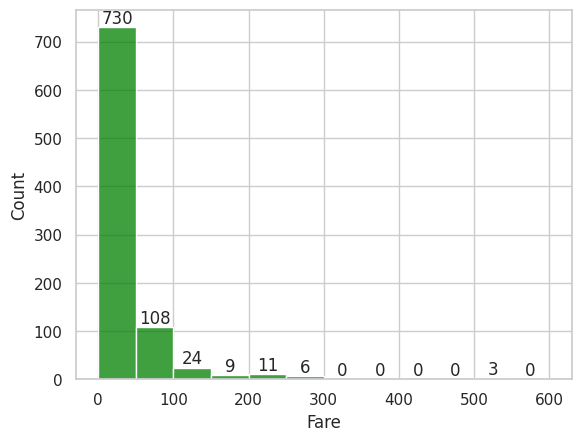

In [29]:
ax = sns.histplot(data=df, x ="Fare", color='green', bins=[0,50,100,150,200,250,300,350,400,450,500,550,600])
ax.bar_label(ax.containers[0])

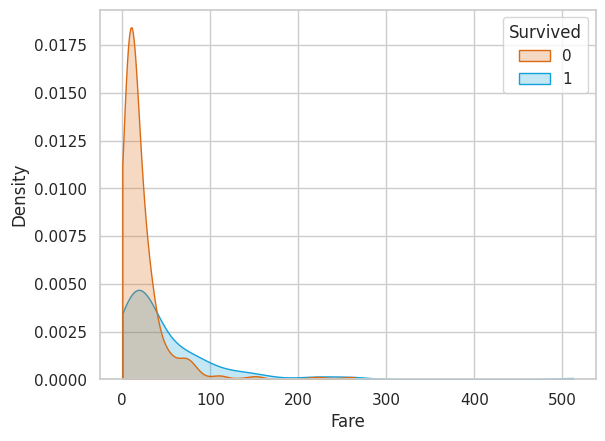

In [30]:
sns.kdeplot(data=df, x="Fare", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [31]:
np.min(df['Fare'])

0.0

In [32]:
np.max(df['Fare'])

512.3292

In [33]:
df['Fare'].mean()

32.204207968574636

In [34]:
mode_fare = round(df['Fare']).mode()
mode_fare

0    8.0
Name: Fare, dtype: float64

In [35]:
mean_fare_pclass1 = df[df['Pclass']==1]['Fare'].mean()
mean_fare_pclass1

84.1546875

In [36]:
mode_fare_pclass1 = round(df[df['Pclass']==1]['Fare']).mode()
mode_fare_pclass1

0    27.0
Name: Fare, dtype: float64

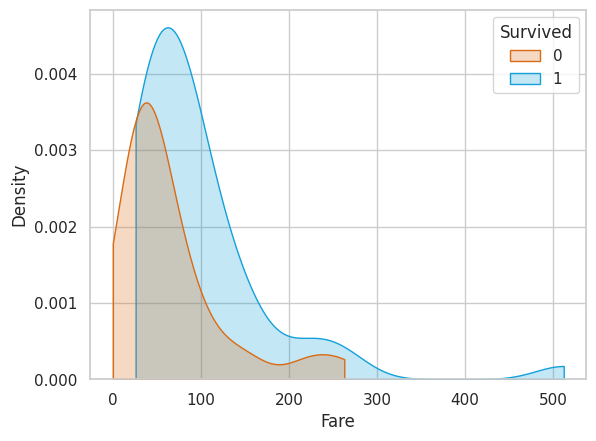

In [37]:
sns.kdeplot(data=df[df['Pclass']==1], x="Fare", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [38]:
mean_fare_pclass2 = df[df['Pclass']==2]['Fare'].mean()
mean_fare_pclass2

20.662183152173913

In [39]:
mode_fare_pclass2 = round(df[df['Pclass']==2]['Fare']).mode()
mode_fare_pclass2

0    13.0
Name: Fare, dtype: float64

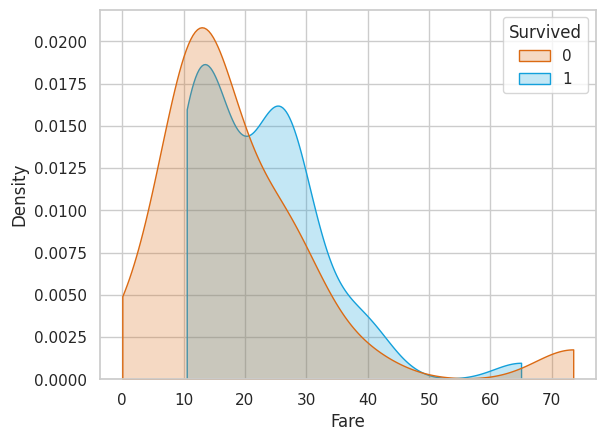

In [40]:
sns.kdeplot(data=df[df['Pclass']==2], x="Fare", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [41]:
mean_fare_pclass3 = df[df['Pclass']==3]['Fare'].mean()
mean_fare_pclass3

13.675550101832993

In [42]:
mode_fare_pclass3 = round(df[df['Pclass']==3]['Fare']).mode()
mode_fare_pclass3

0    8.0
Name: Fare, dtype: float64

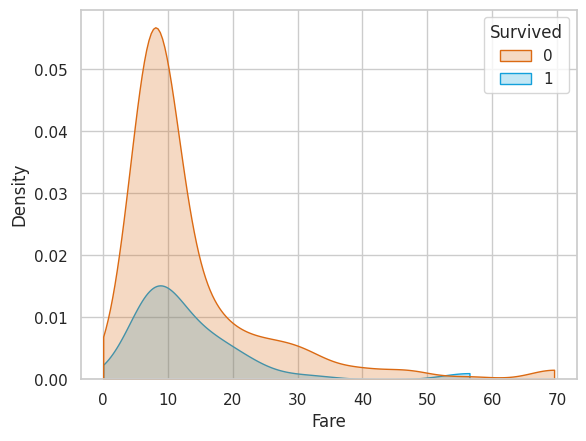

In [43]:
sns.kdeplot(data=df[df['Pclass']==3], x="Fare", fill=True, hue='Survived', cut=0, palette=['#DB6A13', '#13a0db'])

In [44]:
#0 Fare < 8
#1 8 <= Fare < 13
#2 13 <= Fare < 21
#3 21 <= Fare < 27
#4 27 <= Fare < 32
#5 32 <= Fare < 84
#6 84 <= Fare

In [45]:
df['fare_category'] = 0
df.loc[(df['Fare'] < 8),'fare_category'] = 0
df.loc[(df['Fare'] >= 8)&(df['Fare'] < 13),'fare_category'] = 1
df.loc[(df['Fare'] >= 13)&(df['Fare'] < 21),'fare_category'] = 2
df.loc[(df['Fare'] >= 21)&(df['Fare'] < 27),'fare_category'] = 3
df.loc[(df['Fare'] >= 27)&(df['Fare'] < 32),'fare_category'] = 4
df.loc[(df['Fare'] >= 32)&(df['Fare'] < 84),'fare_category'] = 5
df.loc[(df['Fare'] >= 84),'fare_category'] = 6

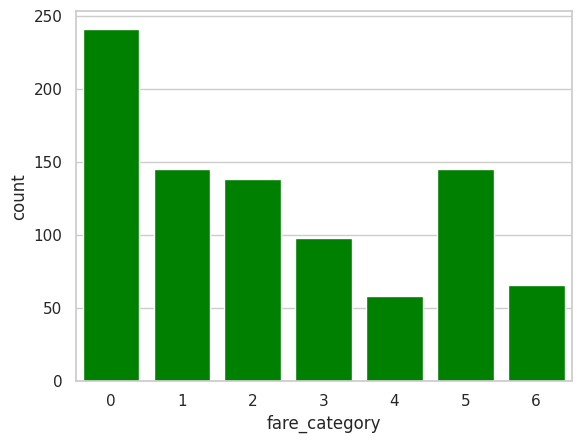

In [46]:
sns.countplot(data=df, x ="fare_category", color='green', saturation=1)

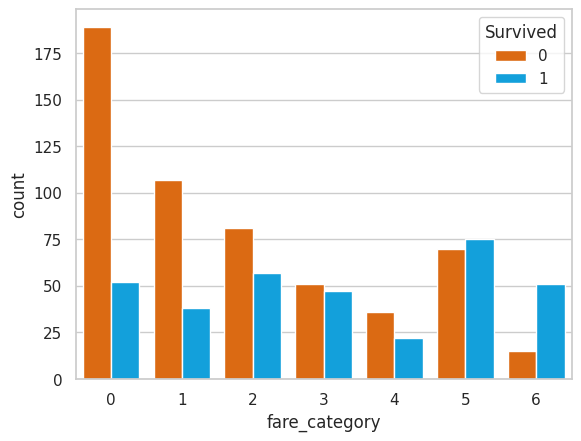

In [47]:
sns.countplot(data=df, x="fare_category", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])

## Embarked

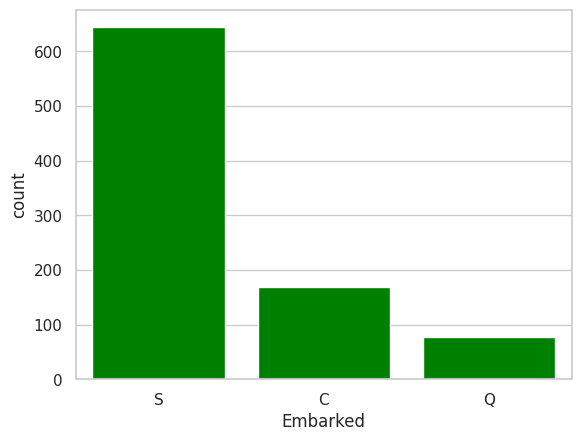

In [48]:
sns.countplot(data=df, x ="Embarked",saturation=1,color='green')

In [49]:
df['Embarked'].fillna('S',inplace=True)

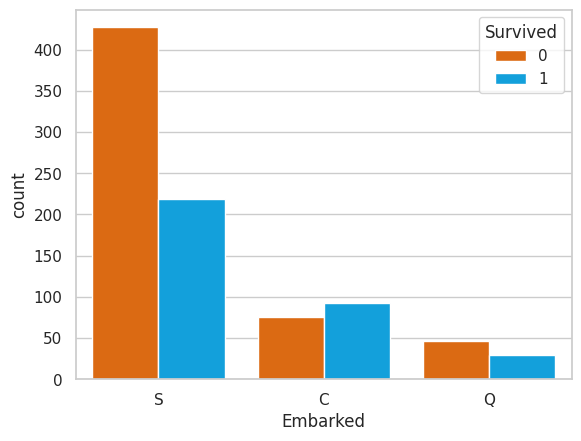

In [50]:
sns.countplot(data=df, x="Embarked", hue='Survived', saturation=1, palette=['#DB6A13', '#13a0db'])

## Encoder

In [51]:
df.drop(['Age', 'Fare'],axis=1,inplace=True)

In [52]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
age_category     0
fare_category    0
dtype: int64

In [53]:
df.dtypes

Survived          int64
Pclass            int64
Sex              object
SibSp             int64
Parch             int64
Embarked         object
age_category      int64
fare_category     int64
dtype: object

In [54]:
# male: 0
# female: 1
print(df['Sex'].unique())
df['Sex'].replace(['male','female'],[0,1],inplace=True)
print(df['Sex'].unique())

['male' 'female']
[0 1]


In [55]:
# S: 0
# C: 1
# Q: 2
print(df['Embarked'].unique())
df['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace=True)
print(df['Embarked'].unique())

['S' 'C' 'Q']
[0 1 2]


In [56]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Embarked         int64
age_category     int64
fare_category    int64
dtype: object

## Corr features

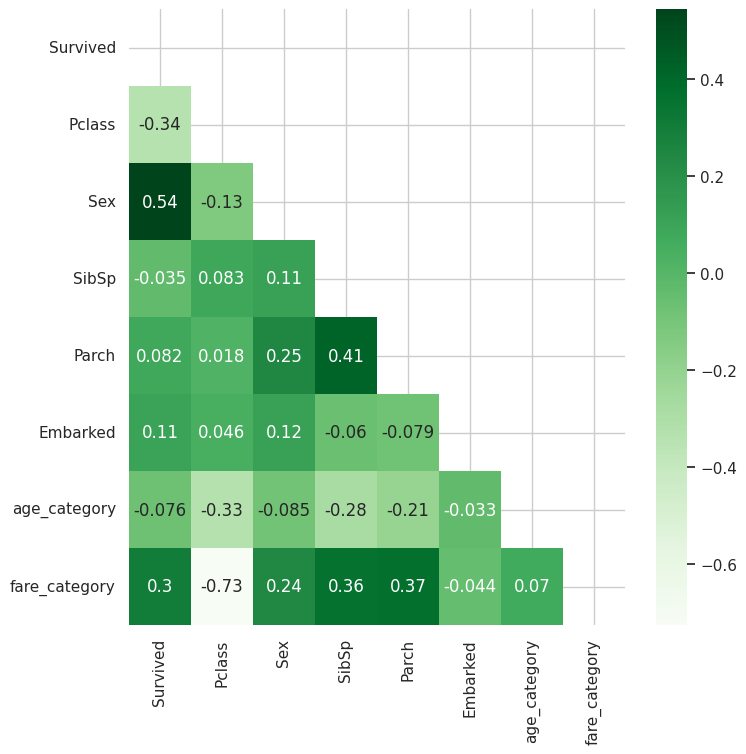

In [57]:
corr_matrix = df.corr()
corr_matrix_t = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', mask=corr_matrix_t)
plt.show()